# Politics and Social Sciences - Session 5 and 6

In this notebook we are going to look into the results of US presidential elections and test the Benford's law. 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

#Read the data
url = 'https://raw.githubusercontent.com/warwickdatasciencesociety/beginners-python/master/session-six/subject_questions/data/president_county_candidate.csv'
votes_df = pd.read_csv(url)
votes_df.head()

,state,county,candidate,party,total_votes,won
0,Delaware,Kent County,Joe Biden,DEM,44552,True
1,Delaware,Kent County,Donald Trump,REP,41009,False
2,Delaware,Kent County,Jo Jorgensen,LIB,1044,False
3,Delaware,Kent County,Howie Hawkins,GRN,420,False
4,Delaware,New Castle County,Joe Biden,DEM,195034,True


The above table (technically a dataframe) contains the results of US presidential elections grouped by each state, county and candidate. From this data set we extract two lists of numbers:

`biden_votes` - a list of total votes for Biden. Each number represents the total number of votes for Biden in a county

`trump_votes` - a list of total votes for Trump. Each number represents the total number of votes for Biden in a county

In [2]:
biden_votes = votes_df[votes_df['candidate'] == 'Joe Biden'].total_votes.to_list()
trump_votes = votes_df[votes_df['candidate'] == 'Donald Trump'].total_votes.to_list()

## Benford's law 
The law of anomalous numbers, or the first-digit law, is an observation about the frequency distribution of leading digits in many real-life sets of numerical data. The law states that in many naturally occurring collections of numbers, the leading digit is likely to be small. In sets that obey the law, the number 1 appears as the leading significant digit about 30% of the time, while 9 appears as the leading significant digit less than 5% of the time.
[<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/4/46/Rozklad_benforda.svg/2560px-Rozklad_benforda.svg.png">](http://google.com.au/)

We would like to test if the 2020 elections data follows the Benford's distribution. The first step is to write a function which given a number returns its first digit. Define this funciton as `get_first_digit()`

In [3]:
def get_first_digit(x):
    return int(str(x)[0])

Now we need to write another function `count_first_digits()` which will calculate the distribution of first digits.
The input for this function is a list of integers $[x_1, x_2, ....., x_n]$ The function should return a new list $[y_0, y_1, ..., y_9]$ such that for each $i\in{0, 1, ..., 9}$,  $y_i$ is the count of $x's$ such that the first digit of $x$ is equal to $i$.  
Example input: $ x = [123, 2343, 6535, 123, 456, 678]$  
Expected output: $ y = [0, 2, 1, 0, 0, 0, 6, 0, 0, 0]$  
In the input list there are 2 numbers whose first digit is 6, therefore $y[6] = 2$

**HINT**: define a counter list of length 10 with every entry initially set to 0. Iterate through the input list and for each number in this list find its first digit and then increase the corresponding value in the counter list by one.

In [4]:
def count_first_digits(votes_ls):
    
    digit_counter = [0 for i in range(0,10)]
    
    for x in votes_ls:
        first_digit = get_first_digit(x)
        digit_counter[first_digit] += 1
        
    return digit_counter

Use the `count_first_digits()` function to calculate the distribution of first digits for Biden and Trump votes. The Benford's law does not take into considaration 0's hence, truncate the lists to delete the first entry (which corresponds to the number of 0 votes for a candidate)

In [5]:
biden_1digits_count = count_first_digits(biden_votes)[1:]
trump_1digits_count = count_first_digits(trump_votes)[1:]

Create a function `calculate_percentages` which given a list of numbers returns a new list whose entries are the values of the input list divided by the total sum of the input list's entries and multiplied by 100. Apply this function to the `biden_1digits_count` and `trump_1digits_count`.

In [6]:
def calculate_percentages(ls):
    sum_ls = sum(ls)
    percentage_ls = []
    for i in range(0,len(ls)):
        percentage_ls.append(ls[i]/sum_ls * 100)
    return percentage_ls

biden_1digits_pc = calculate_percentages(biden_1digits_count)
trump_1digits_pc = calculate_percentages(biden_1digits_count)

Run the cell below to generate the plots for distribution of first digits of Biden's and Trump's votes and compare it against the theoretical Benfords law distribution.

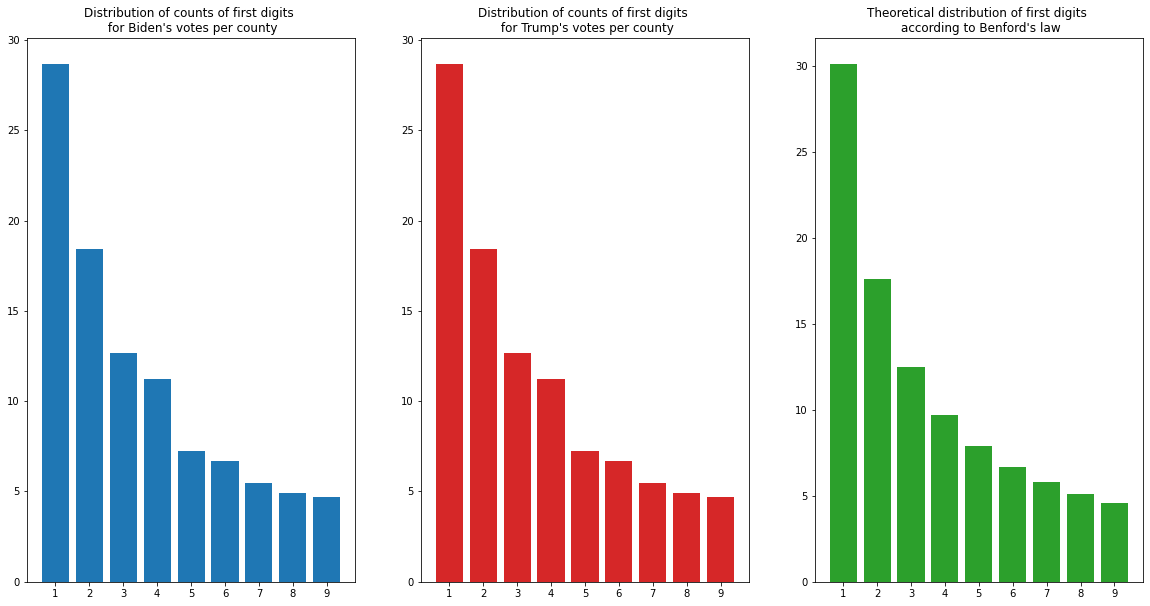

In [7]:
from math import log10

# generate theoretical Benfords distribution
benford = [log10(1 + 1/i)*100 for i in range(1, 10)]

fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize = (20,10))

ax1.bar(x = list(range(1,10)), height = biden_1digits_pc, color = 'C0')
ax2.bar(x = list(range(1,10)), height = trump_1digits_pc, color = 'C3')
ax3.bar(x = list(range(1,10)), height = benford, color = 'C2') 

ax1.set_title("Distribution of counts of first digits \n for Biden's votes per county")
ax2.set_title("Distribution of counts of first digits \n for Trump's votes per county")
ax3.set_title("Theoretical distribution of first digits \n according to Benford's law")

ax1.set_xticks(list(range(1,10)))
ax2.set_xticks(list(range(1,10)))
ax3.set_xticks(list(range(1,10)))

fig.show()

By visual inspection of the distribution plots we could suspect that the first digits law is applies. (To make this statement more rigorous we should run statistical tests to reject or confirm our hypothesis).

## Second-digit Benford's law 

Walter Mebane, a political scientist and statistician at the University of Michigan, was the first to apply the **second-digit** Benford's law-test in election forensics. Such analyses are considered a simple, though not foolproof, method of identifying irregularities in election results and helping to detect electoral fraud.   

In analogy to the previous exercise we would like to inspect now the distribution of second digits in the election results.  Start by writing a function which given a number (you may assume that it has more than than 1 digit) returns its second digit. Define this funciton as `get_second_digit()`

In [8]:
def get_second_digit(x):
    return int(str(x)[1])

Similarily as before define a function `count_first_digits()`.  
**HINT** before applying the `get_second_digit()` function you need to make sure that the number which is currently under consideration is at least 10. If not, then this number should be omitted in the calculations. (Make use of the control flow statements)

In [9]:
def count_first_digits(votes_ls):
    
    digit_counter = [0 for i in range(0,10)]
    
    for x in votes_ls:
        if x < 10:
            continue
        else:
            second_digit = get_second_digit(x)
            digit_counter[second_digit] += 1
        
    return digit_counter

Use the `count_second_digits()` function to calculate the distribution of first digits for Biden and Trump votes. (There is no need to disregard 0's in the case of second digits case). Next apply the `calculate_percentages` functions the newly created lists.

In [10]:
trump_2digits_count = count_first_digits(trump_votes)
biden_2digits_count = count_first_digits(biden_votes)

biden_2digits_pc = calculate_percentages(biden_2digits_count)
trump_2digits_pc = calculate_percentages(trump_2digits_count)

Run the cell below to generate the plots for distribution of second digits for Biden's and Trump's votes.

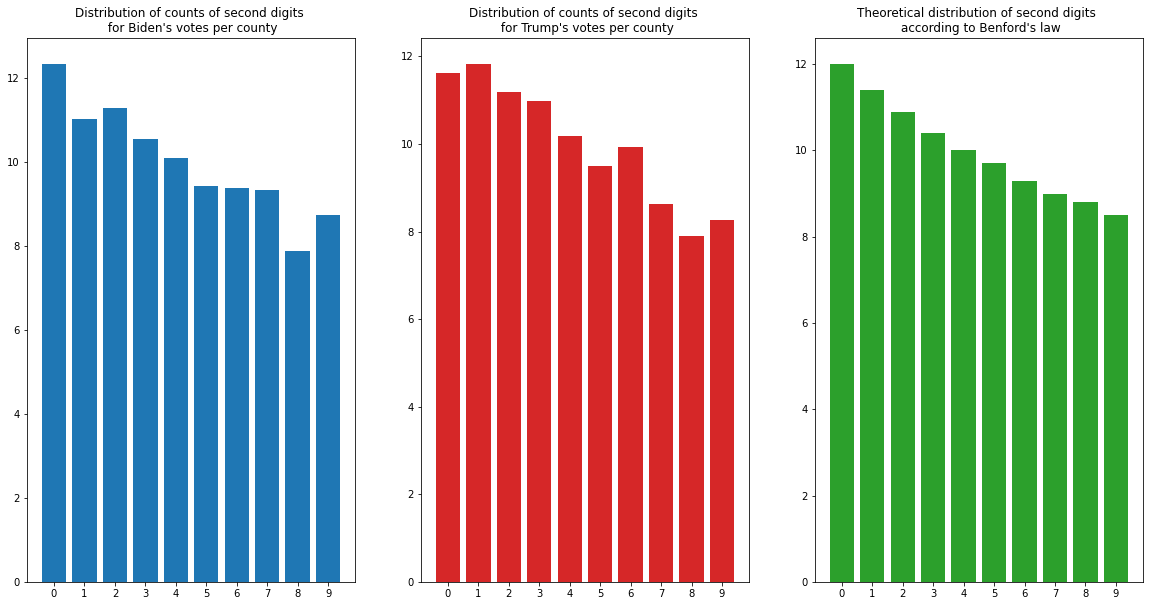

In [11]:
#theoretical distribution of Benford second digits
benford_2 = [12, 11.4, 10.9, 10.4, 10.0, 9.7, 9.3, 9.0, 8.8, 8.5]

fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize = (20,10))

ax1.bar(x = list(range(0,10)), height = biden_2digits_pc, color = 'C0')
ax2.bar(x = list(range(0,10)), height = trump_2digits_pc, color = 'C3')
ax3.bar(x = list(range(0,10)), height = benford_2, color = 'C2') 

ax1.set_title("Distribution of counts of second digits \n for Biden's votes per county")
ax2.set_title("Distribution of counts of second digits \n for Trump's votes per county")
ax3.set_title("Theoretical distribution of second digits \n according to Benford's law")

ax1.set_xticks(list(range(0,10)))
ax2.set_xticks(list(range(0,10)))
ax3.set_xticks(list(range(0,10)))

fig.show()

The distributions still seem to be fairly similar to the theoretical distribution of second digits according to Benford's law. The two tests did not produce any striking results, there are no signs of irregularity in the officially declared vote counts.